<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#READ-IN" data-toc-modified-id="READ-IN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>READ IN</a></span></li><li><span><a href="#TRAIN-—-VALIDATION-—-TEST" data-toc-modified-id="TRAIN-—-VALIDATION-—-TEST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TRAIN — VALIDATION — TEST</a></span></li><li><span><a href="#EXAMINTE-THE-RELATIONSHIP-BETWEEN-CONTINUOUS-FEATURE" data-toc-modified-id="EXAMINTE-THE-RELATIONSHIP-BETWEEN-CONTINUOUS-FEATURE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EXAMINTE THE RELATIONSHIP BETWEEN CONTINUOUS FEATURE</a></span><ul class="toc-item"><li><span><a href="#RELATIONSHIP-BETWEEN-CONTINUOUS-FEATURES" data-toc-modified-id="RELATIONSHIP-BETWEEN-CONTINUOUS-FEATURES-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RELATIONSHIP BETWEEN CONTINUOUS FEATURES</a></span></li><li><span><a href="#RELATIONSHIP-BETWEEN-CONTINUOUS-FEATURES-+-TARGET" data-toc-modified-id="RELATIONSHIP-BETWEEN-CONTINUOUS-FEATURES-+-TARGET-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RELATIONSHIP BETWEEN CONTINUOUS FEATURES + TARGET</a></span><ul class="toc-item"><li><span><a href="#POINT-BISERIAL-CORRELATION" data-toc-modified-id="POINT-BISERIAL-CORRELATION-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>POINT BISERIAL CORRELATION</a></span></li></ul></li><li><span><a href="#RELATIONSHIP-BETWEEN-CATEGORICAL-FEATURES-+-TARGET" data-toc-modified-id="RELATIONSHIP-BETWEEN-CATEGORICAL-FEATURES-+-TARGET-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>RELATIONSHIP BETWEEN CATEGORICAL FEATURES + TARGET</a></span></li><li><span><a href="#Colinearity" data-toc-modified-id="Colinearity-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Colinearity</a></span></li></ul></li><li><span><a href="#LINEAR-REGRESSION" data-toc-modified-id="LINEAR-REGRESSION-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LINEAR REGRESSION</a></span><ul class="toc-item"><li><span><a href="#SAVE-THE-VARIOUS-DATAFRAMES-STATES-FOR-CONSISTENCY-BETWEEN-MODEL-TESTS" data-toc-modified-id="SAVE-THE-VARIOUS-DATAFRAMES-STATES-FOR-CONSISTENCY-BETWEEN-MODEL-TESTS-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>SAVE THE VARIOUS DATAFRAMES STATES FOR CONSISTENCY BETWEEN MODEL TESTS</a></span></li><li><span><a href="#DEFINE-HELPER-FUNCTIONS" data-toc-modified-id="DEFINE-HELPER-FUNCTIONS-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>DEFINE HELPER FUNCTIONS</a></span></li><li><span><a href="#DATA-PREPARATION:-SCALING-&amp;-DUMMY-VARS" data-toc-modified-id="DATA-PREPARATION:-SCALING-&amp;-DUMMY-VARS-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>DATA PREPARATION: SCALING &amp; DUMMY VARS</a></span><ul class="toc-item"><li><span><a href="#FIRST-ATTEMPT" data-toc-modified-id="FIRST-ATTEMPT-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>FIRST ATTEMPT</a></span></li><li><span><a href="#SECOND-ATTEMPT" data-toc-modified-id="SECOND-ATTEMPT-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SECOND ATTEMPT</a></span><ul class="toc-item"><li><span><a href="#ON-THE-TRAINING-SET" data-toc-modified-id="ON-THE-TRAINING-SET-5.3.2.1"><span class="toc-item-num">5.3.2.1&nbsp;&nbsp;</span>ON THE TRAINING SET</a></span></li><li><span><a href="#On-the-Validation-Set" data-toc-modified-id="On-the-Validation-Set-5.3.2.2"><span class="toc-item-num">5.3.2.2&nbsp;&nbsp;</span>On the Validation Set</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Feature-Order-for-Hacky-implementation-of-first-model,-for-Presentation-Demo" data-toc-modified-id="Feature-Order-for-Hacky-implementation-of-first-model,-for-Presentation-Demo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Order for Hacky implementation of first model, for Presentation Demo</a></span></li><li><span><a href="#Export-(poor,-original)-MLR-model-for-demo" data-toc-modified-id="Export-(poor,-original)-MLR-model-for-demo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Export (poor, original) MLR model for demo</a></span></li><li><span><a href="#CHECK-THE-FEATURE-IMPORTANCES-OF-THIS-ITERATION" data-toc-modified-id="CHECK-THE-FEATURE-IMPORTANCES-OF-THIS-ITERATION-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>CHECK THE FEATURE IMPORTANCES OF THIS ITERATION</a></span></li></ul></div>

# IMPORTS

In [1]:
# set the display aspect ratio

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))

In [2]:
# import packages

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
# from treeinterpreter import treeinterpreter as ti
from rfpimp import *
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
# from matplotlib.backends.backend_pdf import PdfPages
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Display plots in the notebook

%matplotlib inline

In [4]:
# load custom function for assessing dataframes succinctly

def assess_df(df):
  
    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    # check for constant columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
            
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# READ IN

In [4]:
path = '/tmp/ssh_mount/data/dataframes/L145/145ABT.feather'

df = pd.read_feather(path)

In [6]:
df.head()

,STOP_ID,MONTH,DAYOFWEEK,ARRIVAL_INTERVAL,PLANNEDTIME_ARR,SCHOOL_OFF,RAIN,TEMP,ACTUALTIME_ARR
0,2013,2,6,15:00 - 15:30,55128,0,0.000000,10.000000,55231
1,2964,2,6,15:30 - 16:00,57113,0,0.000000,10.000000,57459
2,4175,2,6,16:00 - 16:30,57174,0,0.199951,10.070312,57611
3,2014,2,6,15:00 - 15:30,55200,0,0.000000,10.000000,55277
4,4636,2,6,15:00 - 15:30,55238,0,0.000000,10.000000,55315


In [7]:
assess_df(df)

Datatypes:

STOP_ID             category
MONTH               category
DAYOFWEEK           category
ARRIVAL_INTERVAL    category
PLANNEDTIME_ARR        int32
SCHOOL_OFF          category
RAIN                 float32
TEMP                 float32
ACTUALTIME_ARR         int32
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

4021592 rows in the dataframe.
9 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

                     count          mean           std           min  \
PLANNEDTIME_ARR  4021592.0  53915.532551  16896.684293  22200.000000   
RAIN             4021592.0      0.065601      0.282155      0.000000   
TEMP             4021592.0     10.958720      5.634358     -4.167969   
ACTUALTIME_ARR   4021592.0  54102.292433  16915.229651  21739.000000   

          

# TRAIN — VALIDATION — TEST

In [5]:
predict_features = df.columns.tolist()
predict_features.pop()

'ACTUALTIME_ARR'

In [6]:
target_feature = 'ACTUALTIME_ARR'

In [7]:
X = df[predict_features]
y = df[target_feature]

In [8]:
# set 20% rows aside for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# create test and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [10]:
X_train.shape

(2573818, 8)

# EXAMINTE THE RELATIONSHIP BETWEEN CONTINUOUS FEATURE

Relationships between the continuous features themselves are not included as we know that there is no relationship between actual weather data and timetabled schedule.

## RELATIONSHIP BETWEEN CONTINUOUS FEATURES

<br>

Here we check whether there is a correlation between the continuous features as a point of good practice. We know apriori that there is going to be no dependence between planned arrival time and weather; we may anticipate a minor dependance, negative correlation, between temperature and rainfall.

<br>

In [11]:
# specicify the continuous features

continuous_features = ['PLANNEDTIME_ARR', 'RAIN', 'TEMP']

# check correlation

continuous_correlation = X_train[continuous_features].corr()

In [12]:
continuous_correlation

,PLANNEDTIME_ARR,RAIN,TEMP
PLANNEDTIME_ARR,1.000000,-0.025019,0.005873
RAIN,-0.025019,1.000000,-0.081680
TEMP,0.005873,-0.081680,1.000000


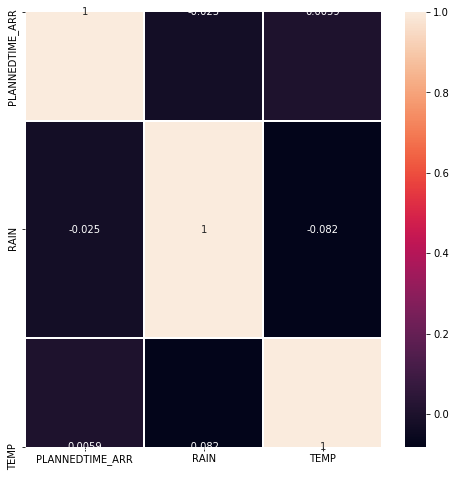

In [13]:
plt.figure(figsize=(8,8))
mask = np.zeros_like(continuous_correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(continuous_correlation, linewidths=.5, annot=True)

<br>

**Result**

<br>

A strong correlation is defined as greater than 0.7; moderate as 0.5 < r < 0.7; weak as below 0.5. There is a clear non-linear-correlation between these features.

<br>

A very strong correlation bewteen features would render one of the features redundant for linear models as it would contribute nothing towards predictive capacity.

<br>

## RELATIONSHIP BETWEEN CONTINUOUS FEATURES + TARGET

### POINT BISERIAL CORRELATION

<br>

Taking a single continuous feature at a time, we investigate the strength of linear correlation between it and the target feature. Here we use the Pearson Product-Moment Coefficient (r-value) to measure this correlation, which also returns a p-value, which taking the number of samples into account, determines whether a possible correlation is statistically legitmate. An r-value with an associated p-value falling above 0.05 cannot be considered a legitmate statement of correlation. 

<br>

In [14]:
X_train.dtypes

STOP_ID             category
MONTH               category
DAYOFWEEK           category
ARRIVAL_INTERVAL    category
PLANNEDTIME_ARR        int32
SCHOOL_OFF          category
RAIN                 float32
TEMP                 float32
dtype: object

<br>

Calculating the correlation coefficient (r-value) 

<br>

In [15]:
# determine the r- and p-values for planned arrival times with target

stats.pointbiserialr(X_train.PLANNEDTIME_ARR, y_train)

PointbiserialrResult(correlation=0.9996870194447158, pvalue=0.0)

In [16]:
# determine the r- and p-values for rainfall with target

stats.pointbiserialr(X_train.RAIN, y_train)

PointbiserialrResult(correlation=-0.024152785663839382, pvalue=0.0)

In [17]:
# determine the r- and p-values for temperature with target

stats.pointbiserialr(X_train.TEMP, y_train)

PointbiserialrResult(correlation=0.007211572267698842, pvalue=5.86471717791226e-31)

<br>

**Results:**

<br>

RAIN and temp have a p-value under .05, thus a valid correlation; they however have a weak correlation. 

<br>

PLANNEDTIME_ARR has a very strong and valid correlation.

<br>

VISUALISE THESE RELATIONSHIPS: SCATTER PLOT

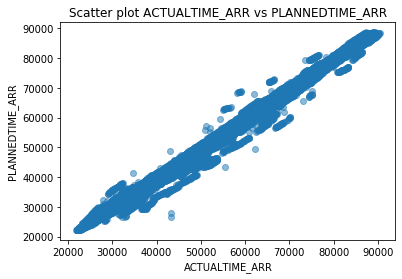

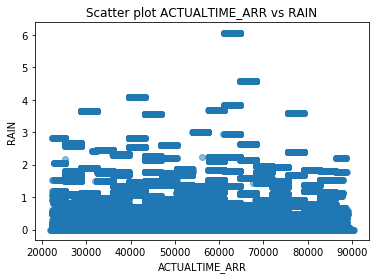

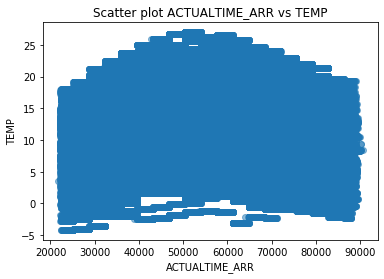

In [18]:
continuous_features = ['PLANNEDTIME_ARR', 'RAIN', 'TEMP']

for feature in continuous_features:    
    plt.scatter(y_train, X_train[feature], alpha=0.5)
    plt.title('Scatter plot ACTUALTIME_ARR vs ' + feature)
    plt.ylabel(feature)
    plt.xlabel('ACTUALTIME_ARR')
    plt.show()

## RELATIONSHIP BETWEEN CATEGORICAL FEATURES + TARGET

<br>

**Small Multiples**

<br>

The first plot is a base plot: the density distribution of the target feature's values as such. Then, for each categorical feature's values the target's values are again plotted. If the categorical feature plots differ among themselves, it indicates a strong relationship between that feature and the target. If the barplots taken together – as far as possible – differ significantly from the base plot, this is another indication of a strong relatinship.

<br>

In [19]:
X_train.head(1)

,STOP_ID,MONTH,DAYOFWEEK,ARRIVAL_INTERVAL,PLANNEDTIME_ARR,SCHOOL_OFF,RAIN,TEMP
3344480,772,9,4,14:30 - 15:00,53353,0,0.0,14.398438


In [20]:
X_train.dtypes

STOP_ID             category
MONTH               category
DAYOFWEEK           category
ARRIVAL_INTERVAL    category
PLANNEDTIME_ARR        int32
SCHOOL_OFF          category
RAIN                 float32
TEMP                 float32
dtype: object

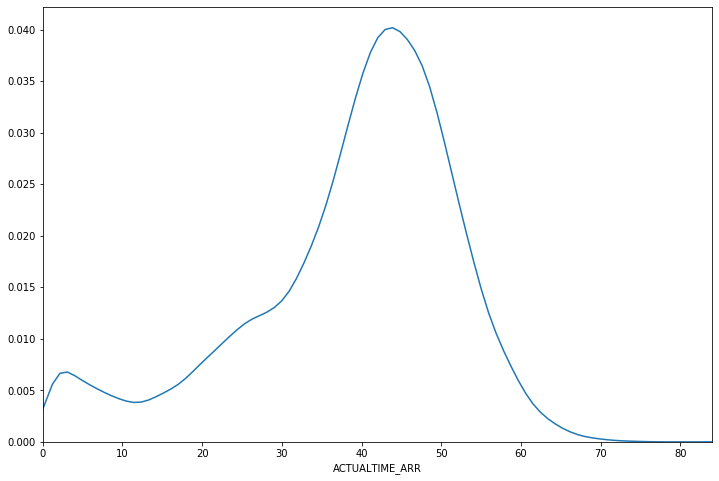

In [21]:
plt.subplots(figsize=(12,8))
plt.xlim(0, y_train.value_counts().max())
sns.distplot(y_train.value_counts(sort=False), bins=100, kde=True, hist=False)

In [22]:
def small_multiples(feature):
    
    total_train = X_train.copy()
    total_train['ACTUALTIME_ARR'] = y_train
    
    feature_values = sorted(X_train[feature].unique().tolist())
    
    for f in feature_values:
#         temp = total_train.loc[total_train[feature] == f]
        plt.xlim(0, y_train.value_counts().max())
#         sns.distplot(temp['ACTUALTIME_ARR'].value_counts(sort=False), bins=500, kde=True, hist=False)
        
        values = total_train.loc[total_train[feature] == f, 'ACTUALTIME_ARR'].value_counts(sort=False)
        sns.distplot(values, bins=100, kde=True, hist=False)


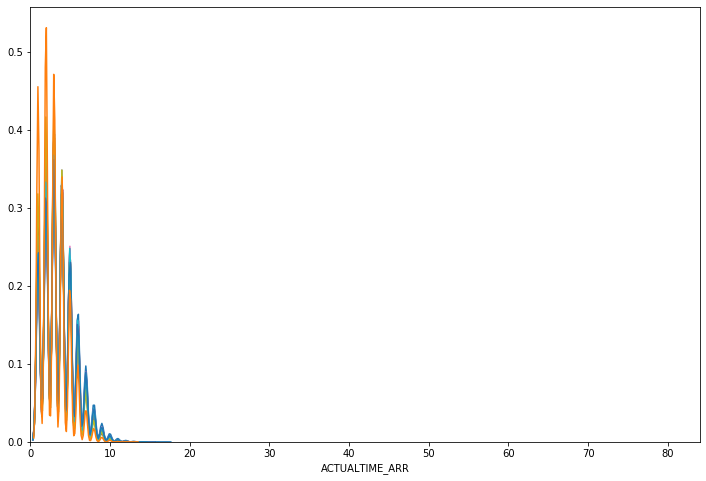

In [23]:
plt.subplots(figsize=(12,8))
small_multiples('MONTH')

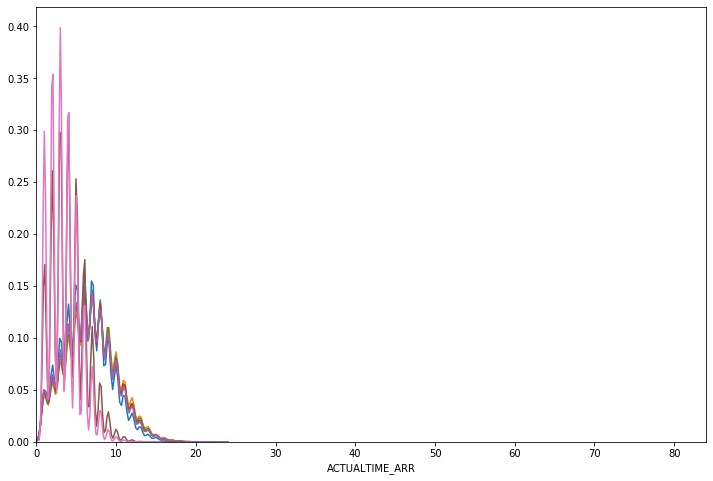

In [24]:
plt.subplots(figsize=(12,8))
small_multiples('DAYOFWEEK')

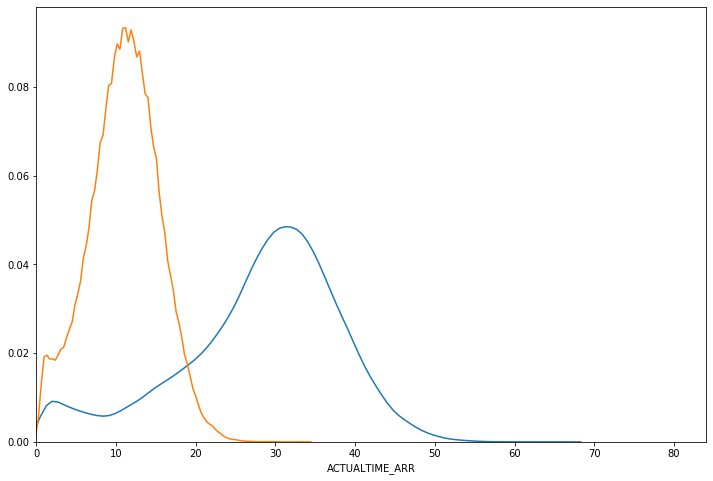

In [25]:
plt.subplots(figsize=(12,8))
small_multiples('SCHOOL_OFF')

<br>

**Results**

<br>

Month and day of the week appear to have a relationship to the target feature. School off appears to less so have one.

<br>

## Colinearity

An alternative way to guage linear relationships between predictive features: measure of colinearity, or the ability of one feature to determine the value of another to a degree of accuracy.

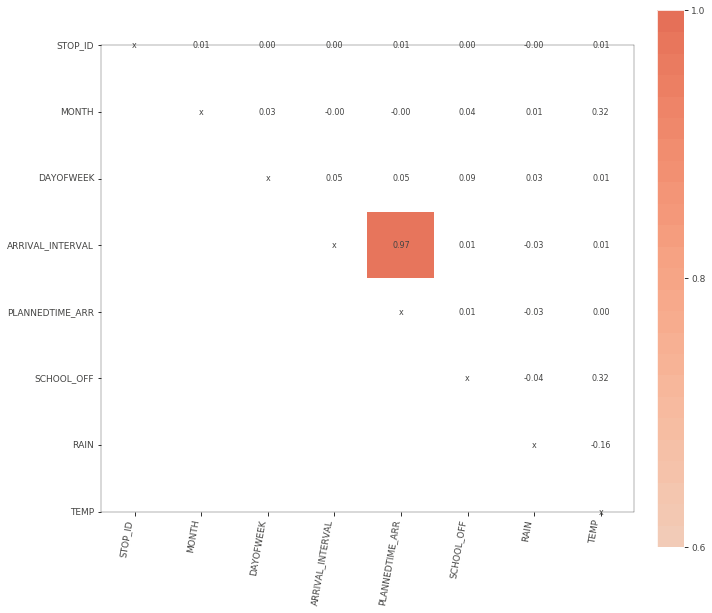

In [26]:
visual_colinearity = plot_corr_heatmap(X_train, figsize=(10,10))

<br>

Contra much literature, multicolinearity does not affect the predictive capacity of a model (Applied Linear Statistics Models, 4th Ed, p289). It may affect explainability, however our concern is prediction.

<br>

# LINEAR REGRESSION

## SAVE THE VARIOUS DATAFRAMES STATES FOR CONSISTENCY BETWEEN MODEL TESTS

In [27]:
# reset indices

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [121]:
# save train, validation, test sets.

X_train.to_feather('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/xtrain.feather')
y_train.to_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/ytrain.csv', )
X_val.to_feather('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/xval.feather')
y_val.to_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/yval.csv')
X_test.to_feather('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/xtest.feather')
y_test.to_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/ytest.csv')

/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


## DEFINE HELPER FUNCTIONS

In [1]:
# Define a function that will make dummies of a categorical feature or a series
# This will be used repeatedly. Thus DRY code.

def get_dummies(data):
    
    """
    Creates new binary features for each value for each categorical feature -1, or for series
    Input: Dataframe or Series
    Output: Dataframe with value indicator columes added; or dummified Series
    """
    
    if isinstance(data, pd.DataFrame):
        df = data
        categorical_features = df.select_dtypes(['category']).columns
        for feature in categorical_features:
            dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=True)
            df = pd.concat([df, dummies], axis=1)
            df.reset_index(drop=True, inplace=True)
        for feature in categorical_features:
            df.drop(feature, axis=1, inplace=True)
        return df
    elif isinstance(data, pd.Series):
        series = data
        dummies = pd.get_dummies(series).iloc[:, 1:]
        return dummies

In [2]:
# Define a function that will centre and scale continuous feature values

def centre_scale(df):
    
    df = df
    
    """
    Centres and scales the continuous features' values
    Input: dataframe
    Output: dataframe with its continuous features scaled
    """
    
#     continuous_subset = pd.DataFrame(df.select_dtypes(include=[np.number])
#     noncontinuous_subset = pd.DataFrame(df.select_dtypes(['category']))
    
    continuous_subset = df.select_dtypes(include=[np.number])
    noncontinuous_subset = df.select_dtypes(['category'])
    
    standard_scaler = StandardScaler()
    scaled = standard_scaler.fit_transform(continuous_subset)
    scaled_df = pd.DataFrame(scaled, columns=continuous_subset.columns)
    
    scaled_df.reset_index(drop=True, inplace=True)
    noncontinuous_subset.reset_index(drop=True, inplace=True)

    join = pd.concat([scaled_df, noncontinuous_subset], axis=1)
    join.reset_index(drop=True, inplace=True)
    
    dump(standard_scaler, '/Users/davidodwyer/Desktop/basic_mlr_145_scaler.joblib')
    
    return join

## DATA PREPARATION: SCALING & DUMMY VARS

### FIRST ATTEMPT

In [31]:
# read in training set predictors

X_train = pd.read_feather('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/xtrain.feather')

In [32]:
# read in training set target

y_train = pd.read_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/ytrain.csv', header=None)

In [33]:
# inspect head

X_train.head(2)

,STOP_ID,MONTH,DAYOFWEEK,ARRIVAL_INTERVAL,PLANNEDTIME_ARR,SCHOOL_OFF,RAIN,TEMP
0,774,1,5,16:00 - 16:30,58141,0,0.333252,11.101562
1,4171,10,2,18:30 - 19:00,67341,1,0.000000,8.234375


In [34]:
y_train.head()

,0,1
0,0,57925
1,1,67848
2,2,51201
3,3,48103
4,4,40497


In [35]:
# drop included index

y_train.drop(0, axis=1, inplace=True)

In [36]:
y_train.head(2)

,1
0,57925
1,67848


In [37]:
# view values

y_train.unstack().values

array([57925, 67848, 51201, ..., 62904, 74458, 84137])

In [38]:
# centre and scale the continuous data

X_train = centre_scale(X_train)

In [ ]:
# create dummy variables for the categorical features

X_train = get_dummies(X_train)

In [ ]:
# attempt to assess the df

# assess_df(X_train)

In [ ]:
# check how large the df is

X_train.info(memory_usage='deep')

This dataset is far too large.

### SECOND ATTEMPT

<br>

Here we will represent the stop id as an int, rather than a categorical

<br>

#### ON THE TRAINING SET

In [5]:
# re-import the training set

X_train = pd.read_feather('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/xtrain.feather')

In [6]:
X_train

,STOP_ID,MONTH,DAYOFWEEK,ARRIVAL_INTERVAL,PLANNEDTIME_ARR,SCHOOL_OFF,RAIN,TEMP
0,774,1,5,16:00 - 16:30,58141,0,0.333252,11.101562
1,4171,10,2,18:30 - 19:00,67341,1,0.000000,8.234375
2,4132,8,4,14:00 - 14:30,51283,1,0.000000,22.937500
3,7588,11,0,13:00 - 13:30,49097,0,0.000000,10.796875
4,5091,2,0,11:00 - 11:30,40424,0,0.000000,1.766602
5,2009,3,4,12:30 - 13:00,46404,0,0.000000,8.968750
6,2062,4,5,17:00 - 17:30,62500,0,0.000000,17.031250
7,4179,5,6,12:00 - 12:30,43431,0,0.000000,15.968750
8,7453,5,1,19:00 - 19:30,67995,0,0.000000,17.562500
9,406,11,6,18:30 - 19:00,66959,0,0.033325,10.234375


In [7]:
# reimport the target values

y_train = pd.read_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/ytrain.csv', header=None)

In [8]:
# drop the included index column

y_train.drop(0, axis=1, inplace=True)

In [9]:
# extract stop id series as int type

stop_id = X_train.STOP_ID.astype('int32')

In [10]:
# drop stop id as categorical

X_train.drop('STOP_ID', axis=1, inplace=True)

In [11]:
# centre and scale the continuous data

X_train = centre_scale(X_train)

In [12]:
# get dummies for the categorical features

X_train = get_dummies(X_train)

In [13]:
# add the (now integer type) stop id to the dataframe

X_train['STOP_ID'] = stop_id

In [15]:
# instantiate and train a linear regression model

mlr = LinearRegression().fit(X_train, y_train.unstack().values)

In [13]:
# generate predictions on the training data

mlr_predictions = mlr.predict(X_train)

In [14]:
# print mean square error 

mean_squared_error(y_train.unstack().values, mlr_predictions)

103683.00559753217

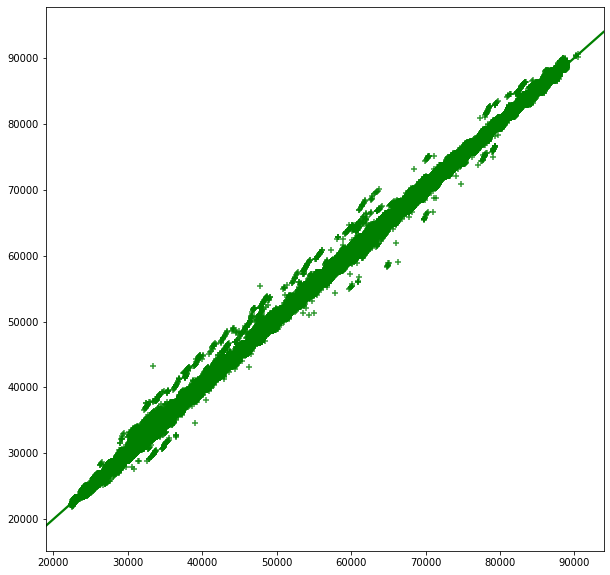

In [15]:
# scatter plot predicted v. actual values

plt.figure(figsize=(10, 10))
sns.regplot(mlr_predictions, y_train.unstack().values, scatter=True, marker="+", color="g")

<br>

Result: Linear Relationship
    
<br>

In [37]:
# calculate the r2 score

r2_score(mlr_predictions, y_train.unstack().values)

0.9996376499477145

In [45]:
# for the first ten predictions, compare actual v. predicted: values and time difference (+/-)

print('PREDICTION — ACTUAL — TIME DIFFERENCE')

for i in range(0,10):
    time_diff = abs(int(mlr_predictions[i]) - y_train.unstack().values[i]) / 60
    print(int(mlr_predictions[i]), "—", y_train.unstack().values[i], "—", round(time_diff, 1), "minutes")

PREDICTION — ACTUAL — TIME DIFFERENCE
58321 — 57925 — 6.6 minutes
67520 — 67848 — 5.5 minutes
51480 — 51201 — 4.6 minutes
48626 — 48103 — 8.7 minutes
40497 — 40497 — 0.0 minutes
46395 — 46304 — 1.5 minutes
62466 — 62906 — 7.3 minutes
43768 — 43416 — 5.9 minutes
68637 — 68581 — 0.9 minutes
67299 — 67275 — 0.4 minutes


In [51]:
# sample 1000 predictions, find the average difference in time between actual and predicted

time_differences = []

for i in range(0,1000):
    time_diff = abs(int(mlr_predictions[i]) - y_train.unstack().values[i]) / 60
    time_differences.append(time_diff)
    
average_difference = sum(time_differences) / 1000 
print("Average time difference between predicted and actual:", round(average_difference, 3), "minutes")
    

Average time difference between predicted and actual: 3.77 minutes


#### On the Validation Set

In [75]:
# import the validation predictors and targets

X_val = pd.read_feather('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/xval.feather')
y_val = pd.read_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/train_val_test/yval.csv', header=None)

In [76]:
# drop additional index col

y_val.drop(0, axis=1, inplace=True)

In [66]:
# remove the stop id series, as int type

stop_id = X_val.STOP_ID.astype('int32')

In [67]:
# drop stop id as a categorical feature

X_val.drop('STOP_ID', axis=1, inplace=True)

In [68]:
# centre and scale the predictor values

X_val = centre_scale(X_val)

In [69]:
# make dummy variables for categorical features

X_val = get_dummies(X_val)

In [70]:
# add stop id back into the dataframe

X_val['STOP_ID'] = stop_id

In [71]:
# make predictions on the validation set

mlr_predictions = mlr.predict(X_val)

In [24]:
# find the mean square error

mean_squared_error(y_val.unstack().values, mlr_predictions)

104741.32609791262

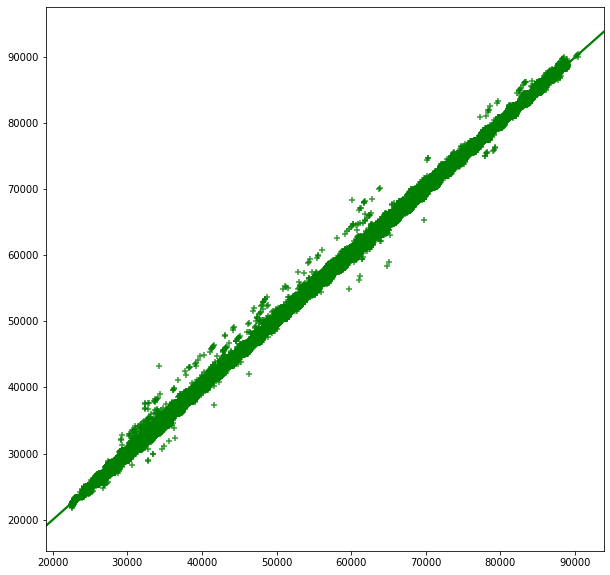

In [88]:
# plot actual vs. predicted values

plt.figure(figsize=(10, 10))
sns.regplot(mlr_predictions, y_val.unstack().values, scatter=True, marker="+", color="g")

In [25]:
# find the r2 score

r2_score(mlr_predictions, y_val.unstack().values)

0.9996337353269863

In [68]:
# for the first 10 predictions, compare with actual values; state time difference

print('PREDICTION — ACTUAL — TIME DIFFERENCE')

for i in range(0,10):
    time_diff = abs(int(mlr_predictions[i]) - y_val.unstack().values[i]) / 60
    print(int(mlr_predictions[i]), "—", y_val.unstack().values[i], "—", round(time_diff, 1), "minutes")

PREDICTION — ACTUAL — TIME DIFFERENCE
38814 — 38838 — 0.4 minutes
70215 — 70092 — 2.0 minutes
69079 — 68545 — 8.9 minutes
65277 — 64752 — 8.8 minutes
31047 — 31186 — 2.3 minutes
57066 — 57197 — 2.2 minutes
37215 — 36819 — 6.6 minutes
38940 — 39174 — 3.9 minutes
65990 — 66390 — 6.7 minutes
61922 — 61594 — 5.5 minutes


In [70]:
# for the first 1000 predictions, find the average difference in actual v. predicted time

time_differences = []

for i in range(0,1000):
    time_diff = abs(int(mlr_predictions[i]) - y_val.unstack().values[i]) / 60
    time_differences.append(time_diff)
    
average_difference = sum(time_differences) / 1000
print("Average time difference between predicted and actual:", round(average_difference, 3), "minutes")

Average time difference between predicted and actual: 4.213 minutes


In [71]:
# for the first 1000 predictions, find proportion of later / earlier than actual time.

later_than_actual = 0
earlier_than_actual = 0

for i in range(0,1000):
    if mlr_predictions[i] > y_val.unstack().values[i]:
        later_than_actual += 1
    else:
        earlier_than_actual +=1
        
print("% trips earlier than scheduled = ", (earlier_than_actual / 1000)*100)
print("% trips later than scheduled = ", (later_than_actual / 1000)*100)

% trips earlier than scheduled =  43.7
% trips later than scheduled =  56.3


In [89]:
# for the second 1000 predictions, find proportion of later / earlier than actual time.

later_than_actual = 0
earlier_than_actual = 0

for i in range(1000,2000):
    if mlr_predictions[i] > y_val.unstack().values[i]:
        later_than_actual += 1
    else:
        earlier_than_actual +=1
        
print("% trips earlier than scheduled = ", (earlier_than_actual / 1000)*100)
print("% trips later than scheduled = ", (later_than_actual / 1000)*100)

% trips earlier than scheduled =  44.6
% trips later than scheduled =  55.400000000000006


In [80]:
# print the weights for each feature

list(zip(list(X_val.columns),mlr.coef_.ravel()))

[('PLANNEDTIME_ARR', 10476.724720372087),
 ('RAIN', 9.70011287941361),
 ('TEMP', 13.04820613625634),
 ('MONTH_2', 94.64224314042622),
 ('MONTH_3', 89.49329402845615),
 ('MONTH_4', 68.26943933529128),
 ('MONTH_5', 47.36944933449013),
 ('MONTH_6', 34.48156279640261),
 ('MONTH_7', 134.7341197776168),
 ('MONTH_8', 121.43496786055857),
 ('MONTH_9', 102.80169792173274),
 ('MONTH_10', 76.23110212858501),
 ('MONTH_11', 46.81890852085235),
 ('MONTH_12', 180.77670557688907),
 ('DAYOFWEEK_1', 33.663757040759265),
 ('DAYOFWEEK_2', 62.90813950076108),
 ('DAYOFWEEK_3', 86.0890789017817),
 ('DAYOFWEEK_4', 108.85724023604098),
 ('DAYOFWEEK_5', 46.48166044235268),
 ('DAYOFWEEK_6', 56.51352245652106),
 ('ARRIVAL_INTERVAL_00:30 - 01:00', 3.637978807091713e-11),
 ('ARRIVAL_INTERVAL_01:00 - 01:30', -2.2737367544323206e-12),
 ('ARRIVAL_INTERVAL_01:30 - 02:00', -2.7284841053187847e-11),
 ('ARRIVAL_INTERVAL_02:00 - 02:30', 1.5916157281026244e-11),
 ('ARRIVAL_INTERVAL_02:30 - 03:00', 2.7284841053187847e-11),
 

In [81]:
mlr.intercept_

54987.747142581444

<br>

Commentary on the above is lacking as this exploratory modelling is to be repeated with an improved Analytics Base Table. See below

<br>

<br>

I will cease this modelling, and begin a remodelling in order to encode hour, day, and month – the cyclic ordinal features – more appropriately, i.e. capturing that nature, as opposed to using dummy variables. Further, stop_id is incorrectly encoded as an integer, presenting the algorithms with an inaccurate view of the nature of these categorical data – an oversight due arising from the move away from adding 4000+ dummy variables. A solution will be found. Further, ideally, route variations can be incorporated into the model.

<br>

I will also continue as planned to derive confidence measures of the predictions, examine feature importance, and test improvements with polynomial transformations.

<br>

# Feature Order for Hacky implementation of first model, for Presentation Demo

In [38]:
for col in X_train.columns:
    print(col)

PLANNEDTIME_ARR
RAIN
TEMP
MONTH_2
MONTH_3
MONTH_4
MONTH_5
MONTH_6
MONTH_7
MONTH_8
MONTH_9
MONTH_10
MONTH_11
MONTH_12
DAYOFWEEK_1
DAYOFWEEK_2
DAYOFWEEK_3
DAYOFWEEK_4
DAYOFWEEK_5
DAYOFWEEK_6
ARRIVAL_INTERVAL_00:30 - 01:00
ARRIVAL_INTERVAL_01:00 - 01:30
ARRIVAL_INTERVAL_01:30 - 02:00
ARRIVAL_INTERVAL_02:00 - 02:30
ARRIVAL_INTERVAL_02:30 - 03:00
ARRIVAL_INTERVAL_03:00 - 03:30
ARRIVAL_INTERVAL_03:30 - 04:00
ARRIVAL_INTERVAL_04:00 - 04:30
ARRIVAL_INTERVAL_04:30 - 05:00
ARRIVAL_INTERVAL_05:00 - 05:30
ARRIVAL_INTERVAL_05:30 - 06:00
ARRIVAL_INTERVAL_06:00 - 06:30
ARRIVAL_INTERVAL_06:30 - 07:00
ARRIVAL_INTERVAL_07:00 - 07:30
ARRIVAL_INTERVAL_07:30 - 08:00
ARRIVAL_INTERVAL_08:00 - 08:30
ARRIVAL_INTERVAL_08:30 - 09:00
ARRIVAL_INTERVAL_09:00 - 09:30
ARRIVAL_INTERVAL_09:30 - 10:00
ARRIVAL_INTERVAL_10:00 - 10:30
ARRIVAL_INTERVAL_10:30 - 11:00
ARRIVAL_INTERVAL_11:00 - 11:30
ARRIVAL_INTERVAL_11:30 - 12:00
ARRIVAL_INTERVAL_12:00 - 12:30
ARRIVAL_INTERVAL_12:30 - 13:00
ARRIVAL_INTERVAL_13:00 - 13:30
ARRIV

# Export (poor, original) MLR model for demo

In [41]:
dump(mlr, '/Users/davidodwyer/Desktop/original_mlr.joblib')

['/Users/davidodwyer/Desktop/original_mlr.joblib']

In [78]:
X_val.head(2)

,STOP_ID,MONTH,DAYOFWEEK,ARRIVAL_INTERVAL,PLANNEDTIME_ARR,SCHOOL_OFF,RAIN,TEMP
0,3144,8,3,10:30 - 11:00,38624,1,0.0,16.234375
1,7588,3,5,19:00 - 19:30,70526,1,0.0,4.566406


In [79]:
mlr_predictions[1]

70215.66110250054

# CHECK THE FEATURE IMPORTANCES OF THIS ITERATION

In [23]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# X_train.STOP_ID = X_train.STOP_ID.astype('int')
# # lb_enc = LabelEncoder()
# # X_train.STOP_ID = lb_enc.fit_transform(X_train)
# ohe = OneHotEncoder(handle_unknown='error', drop='first')
# ohe.fit_transform(X_train.STOP_ID.values.reshape(-1,1))

In [21]:
def l1_regular_rank_features(Xset,Yset):
    
    """
    Uses L1 Regularisation to estimate feature importances.
    Rough estimate. Greater linear weights does not
    exhaust criteria for feature importance.
    """
    
    features = list(Xset.columns.values)
    
    lasso = Lasso(alpha=.1)
    lasso.fit(Xset, Yset)
    coefs = list(lasso.coef_.ravel())
    
    # Match the features with their coefficients, print all
    print("L1 Regularisation Importances:\n")
    ranking = list(zip(features, coefs))
    for row in ranking: print('{0:45}  {1}'.format(row[0], row[1]))

We refrain from one-hot-encoding stop_id as this will not be the implementation going forward.

In [22]:
l1_regular_rank_features(X_train, y_train)

L1 Regularisation Importances:

PLANNEDTIME_ARR                                13834.946871342252
RAIN                                           12.800278887202305
TEMP                                           20.72372722395198
MONTH_2                                        112.66204419142528
MONTH_3                                        104.62255252886193
MONTH_4                                        74.90926852566729
MONTH_5                                        45.43597628673739
MONTH_6                                        25.17123396678706
MONTH_7                                        154.58235522916448
MONTH_8                                        137.54070459633377
MONTH_9                                        118.43920276966523
MONTH_10                                       84.92404383269769
MONTH_11                                       48.05349166735726
MONTH_12                                       224.45093595475208
DAYOFWEEK_1                                    40.

/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169740404167.59863, tolerance: 73674029183.11752
  positive)


In [23]:
def rf_feature_importance(Xset, Yset):
    
    """
    Feature importance estimate from tree-based model
    """
    
    features = list(Xset.columns.values)
    
    # Use Random Forests Classifier to rank feature importance
    # Initialise and fit a model
    rf = RandomForestRegressor()
    rf.fit(Xset, Yset)
    
    # Match the features with their Gini coefficients, print all
    print("Random Forest Feature Importances:\n")
    rf_importances = pd.DataFrame(rf.feature_importances_, index = Xset.columns, \
                                  columns=['Importance']).sort_values('Importance', \
                                ascending=False).values
    
    rf_importances = [float(x) for x in rf_importances]
    for row in list(zip(features, rf_importances)): print('{0:45}  {1}'.format(row[0], row[1]))
    

In [24]:
rf_feature_importance(X_train, y_train)

/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Random Forest Feature Importances:

PLANNEDTIME_ARR                                0.9989744447602147
RAIN                                           8.799520742052707e-05
TEMP                                           7.159999591966038e-05
MONTH_2                                        5.961629376740004e-05
MONTH_3                                        5.3569925159352436e-05
MONTH_4                                        4.663419131154126e-05
MONTH_5                                        4.5746851279431196e-05
MONTH_6                                        4.333278532514583e-05
MONTH_7                                        3.872640783366364e-05
MONTH_8                                        3.8194592040387026e-05
MONTH_9                                        3.773723045113415e-05
MONTH_10                                       3.416004130073609e-05
MONTH_11                                       3.357289553058563e-05
MONTH_12                                       3.3314904939308045e-